# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [238]:
df = pd.read_csv('/content/drive/MyDrive/csv/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [239]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [241]:
df.shape

(12316, 32)

In [242]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2954,16:30:00,Tuesday,18-30,Male,Junior high school,Owner,2-5yr,Lorry (11?40Q),Owner,Above 10yr,...,NaN,Driver or rider,Female,Over 51,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8841,11:00:00,Wednesday,Over 51,Male,High school,Employee,Above 10yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
6257,7:55:00,Thursday,31-50,Male,Elementary school,Employee,5-10yr,Public (> 45 seats),Governmental,Above 10yr,...,Going straight,Driver or rider,Female,18-30,3,Other,Normal,Not a Pedestrian,Other,Slight Injury
2327,11:25:00,Friday,Unknown,Male,Junior high school,Owner,2-5yr,NaN,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9289,16:30:00,Monday,18-30,Male,NaN,Employee,NaN,Other,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overspeed,Slight Injury


In [243]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [244]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [245]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [246]:
missing_values = df.isnull().sum()
print(missing_values)

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [247]:
missing_values[missing_values > 0]

,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142


In [248]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [249]:
(missing_values[missing_values > 0].info())

<class 'pandas.core.series.Series'>
Index: 16 entries, Educational_level to Fitness_of_casuality
Series name: None
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 256.0+ bytes


In [250]:
columns_with_missing_values = missing_values[missing_values > 0]

In [251]:
print(df[columns_with_missing_values.index].dtypes)

Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Type_of_vehicle            object
Owner_of_vehicle           object
Service_year_of_vehicle    object
Defect_of_vehicle          object
Area_accident_occured      object
Lanes_or_Medians           object
Road_allignment            object
Types_of_Junction          object
Road_surface_type          object
Type_of_collision          object
Vehicle_movement           object
Work_of_casuality          object
Fitness_of_casuality       object
dtype: object


In [252]:
object_columns_with_missing_values = columns_with_missing_values.index[df[columns_with_missing_values.index].dtypes == 'object']

In [253]:
print(object_columns_with_missing_values )

Index(['Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')


In [254]:
for column in object_columns_with_missing_values:
    df[column] = df[column].fillna(df[column].mode()[0])

In [255]:
columns_with_missing_values

,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142


In [256]:
for column in object_columns_with_missing_values:
    mode_value = df[column].mode()[0]
    print(f"\nBefore filling, number of missing values in '{column}': {df[column].isnull().sum()}")
    print(f"Filling missing values in column '{column}' with mode value: {mode_value}")
    df[column].fillna(mode_value, inplace=True)
    print(f"After filling, number of missing values in '{column}': {df[column].isnull().sum()}")


Before filling, number of missing values in 'Educational_level': 0
Filling missing values in column 'Educational_level' with mode value: Junior high school
After filling, number of missing values in 'Educational_level': 0

Before filling, number of missing values in 'Vehicle_driver_relation': 0
Filling missing values in column 'Vehicle_driver_relation' with mode value: Employee
After filling, number of missing values in 'Vehicle_driver_relation': 0

Before filling, number of missing values in 'Driving_experience': 0
Filling missing values in column 'Driving_experience' with mode value: 5-10yr
After filling, number of missing values in 'Driving_experience': 0

Before filling, number of missing values in 'Type_of_vehicle': 0
Filling missing values in column 'Type_of_vehicle' with mode value: Automobile
After filling, number of missing values in 'Type_of_vehicle': 0

Before filling, number of missing values in 'Owner_of_vehicle': 0
Filling missing values in column 'Owner_of_vehicle' with

In [257]:
columns_with_missing_values

,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142


In [258]:
df.isnull().sum()
# here is a comment of the one  who will Correct my week 2 test the above code => columns_with_missing_values take an old value
# thats why it caused me to get confused and wrote all of these codes multiple times
# with the same functionalty but i learned alot hopfully


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [259]:
df.sample(40)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8766,8:40:00,Monday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,Under 18,3,Other,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10910,18:12:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Pedestrian,Male,18-30,3,Driver,Normal,"Walking along in carriageway, back to traffic",Overtaking,Slight Injury
124,15:52:00,Friday,18-30,Male,Elementary school,Employee,2-5yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
9523,2:55:00,Saturday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Getting off the vehicle improperly,Serious Injury
1438,18:45:00,Monday,Unknown,Male,Elementary school,Employee,Below 1yr,Automobile,Owner,Unknown,...,Going straight,Passenger,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4004,14:50:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Below 1yr,...,Going straight,Driver or rider,Female,Over 51,3,Self-employed,Normal,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury
3530,21:38:00,Wednesday,Unknown,Female,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9638,20:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Other,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
521,11:15:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Public (12 seats),Owner,Unknown,...,Going straight,Pedestrian,Female,Over 51,2,Self-employed,Normal,Crossing from nearside - masked by parked or s...,No priority to vehicle,Slight Injury
7252,7:14:00,Tuesday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Pedestrian,Female,31-50,2,Driver,Normal,Unknown or other,No distancing,Slight Injury


In [261]:
print(df['Time'].dtype)

if df['Time'].dtype != 'datetime64[ns]':
    df['Time'] = pd.to_datetime(df['Time'])


df['Hour'] = df['Time'].dt.hour

object


<ipython-input-261-8a2f095ba51a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])  # Assuming the 'Time' column can be interpreted as datetime


In [287]:

datetime_cols = ['Time']
for col in datetime_cols:
    df[col] = df[col].apply(lambda x: x.toordinal())

In [264]:
df['Hour'].dtype

dtype('int32')

In [265]:
df.replace('Na', np.nan, inplace=True)
df.replace('na', np.nan, inplace=True)
df.replace('NaN', np.nan, inplace=True)

In [266]:
df[['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']].head()

,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Driver or rider,Male,31-50,3
3,Pedestrian,Female,18-30,3
4,NaN,NaN,NaN,NaN


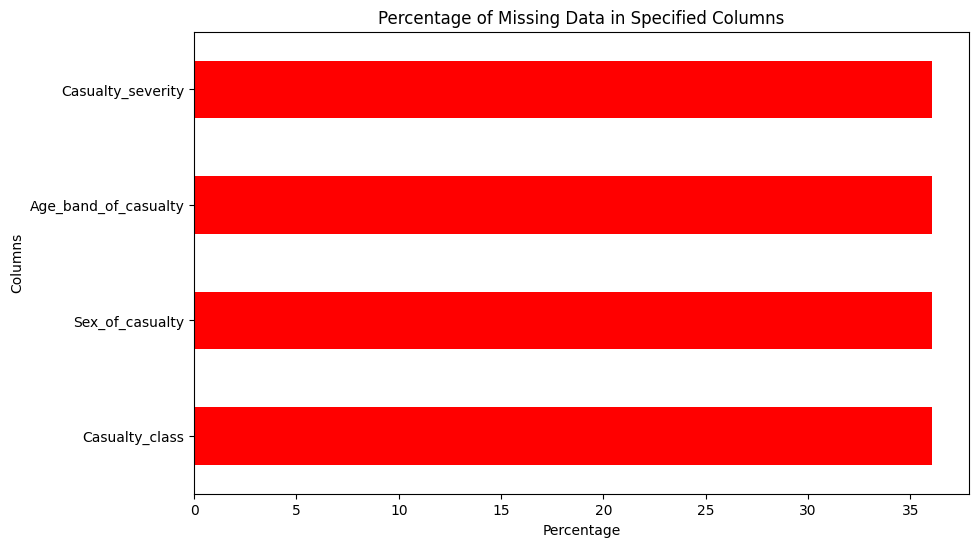

In [270]:
columns_of_interest = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']
missing_data_percent = (df[columns_of_interest].isnull().mean() * 100)
plt.figure(figsize=(10, 6))
missing_data_percent.sort_values().plot.barh(color='red')
plt.title('Percentage of Missing Data in Specified Columns')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()

In [293]:
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_normalized.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
12311,739099,6,1,1,4,0,1,4,3,5,...,3,2,5,3,0,2,5,10,2,16
12312,739099,3,4,1,1,0,2,0,3,5,...,3,2,5,3,0,2,5,10,2,18
12313,739099,3,2,1,4,0,2,1,3,1,...,0,1,1,2,0,2,5,1,1,13
12314,739099,3,0,0,4,0,3,5,3,1,...,3,2,5,3,0,2,5,5,2,13
12315,739099,3,0,1,4,0,2,7,3,1,...,2,0,2,2,0,2,1,1,2,13


In [294]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()



,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,739099,1,0,1,0,0,0,0,3,3,...,3,2,5,3,0,2,5,9,2,17
1,739099,1,1,1,4,0,3,11,3,2,...,3,2,5,3,0,2,5,16,2,17
2,739099,1,0,1,4,0,0,5,3,5,...,0,1,1,2,0,2,5,0,1,17
3,739099,3,0,1,4,0,2,11,0,5,...,2,0,0,2,0,2,5,1,2,1
4,739099,3,0,1,4,0,1,0,3,2,...,3,2,5,3,0,2,5,16,2,1


In [295]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\n First few rows after one-hot encoding:")
df_one_hot_encoded.head()


 First few rows after one-hot encoding:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,739099,1,0,1,0,0,0,0,3,3,...,3,2,5,3,0,2,5,9,2,17
1,739099,1,1,1,4,0,3,11,3,2,...,3,2,5,3,0,2,5,16,2,17
2,739099,1,0,1,4,0,0,5,3,5,...,0,1,1,2,0,2,5,0,1,17
3,739099,3,0,1,4,0,2,11,0,5,...,2,0,0,2,0,2,5,1,2,1
4,739099,3,0,1,4,0,1,0,3,2,...,3,2,5,3,0,2,5,16,2,1


In [274]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
3717,2024-08-01 23:31:00,2,1,1,4,0,2,3,3,5,...,0,1,4,2,0,2,5,10,2,23
3491,2024-08-01 15:45:00,4,1,1,1,0,2,8,3,3,...,1,0,0,2,2,2,5,13,2,15
2702,2024-08-01 11:00:00,6,1,1,4,0,3,8,3,1,...,2,0,4,1,3,2,1,3,2,11
8464,2024-08-01 05:55:00,1,1,1,1,0,2,10,3,3,...,1,0,1,2,0,2,5,1,1,5
977,2024-08-01 18:44:00,5,1,1,1,0,2,2,3,5,...,0,1,0,2,0,2,5,18,2,18


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

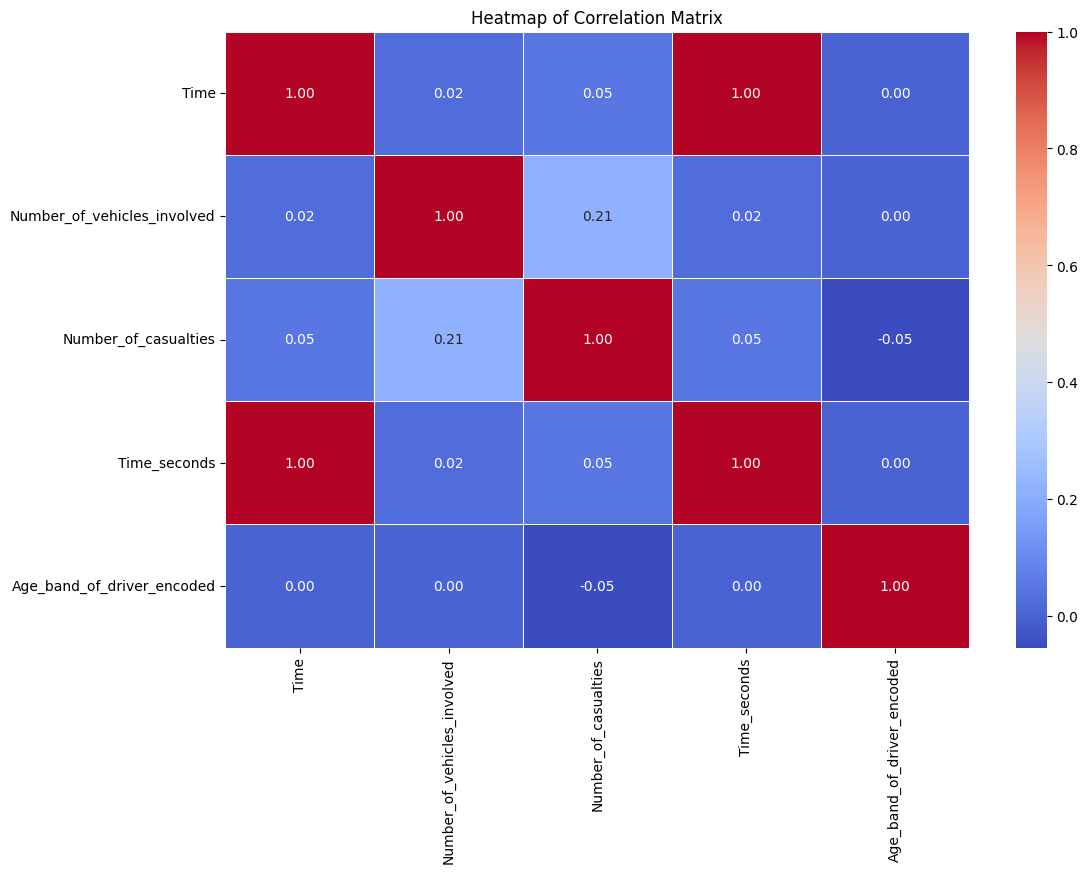

In [225]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

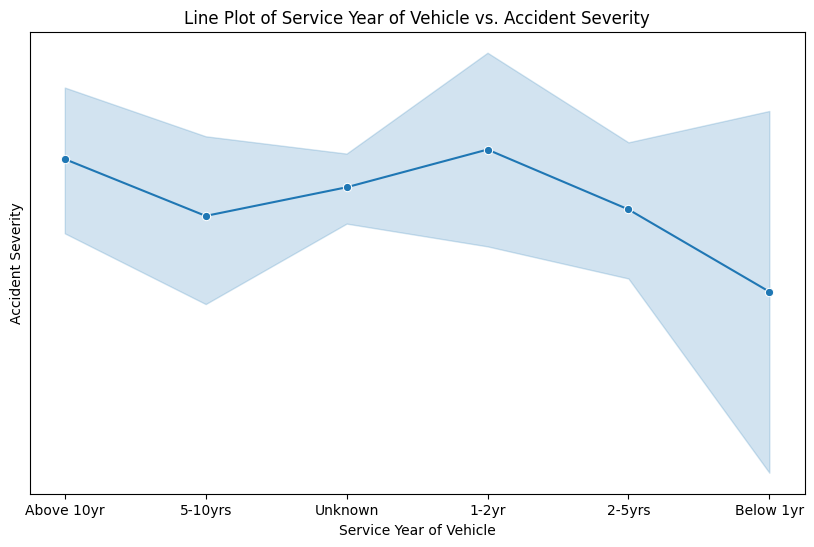

In [226]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Service_year_of_vehicle', y='Accident_severity', marker='o')
plt.title('Line Plot of Service Year of Vehicle vs. Accident Severity')
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Accident Severity')
plt.show()

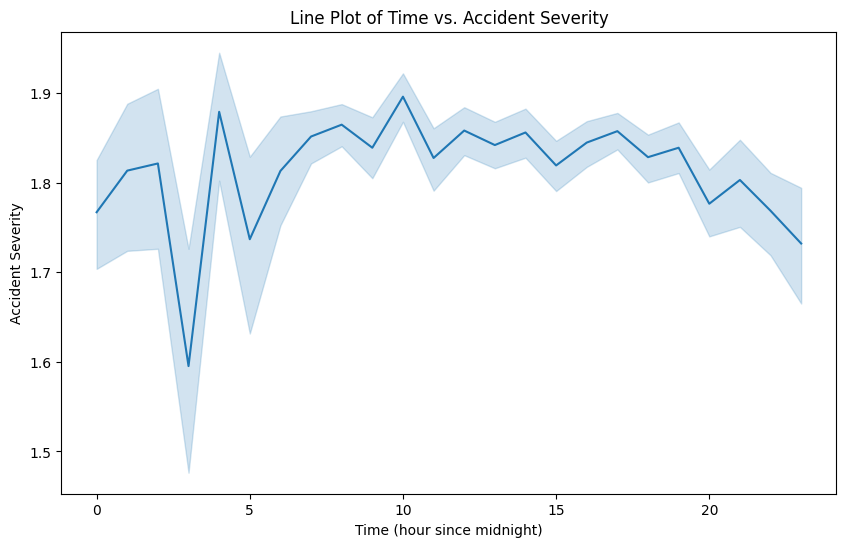

In [276]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='Accident_severity', )
plt.title('Line Plot of Time vs. Accident Severity')
plt.xlabel('Time (hour since midnight)')
plt.ylabel('Accident Severity')
plt.show()

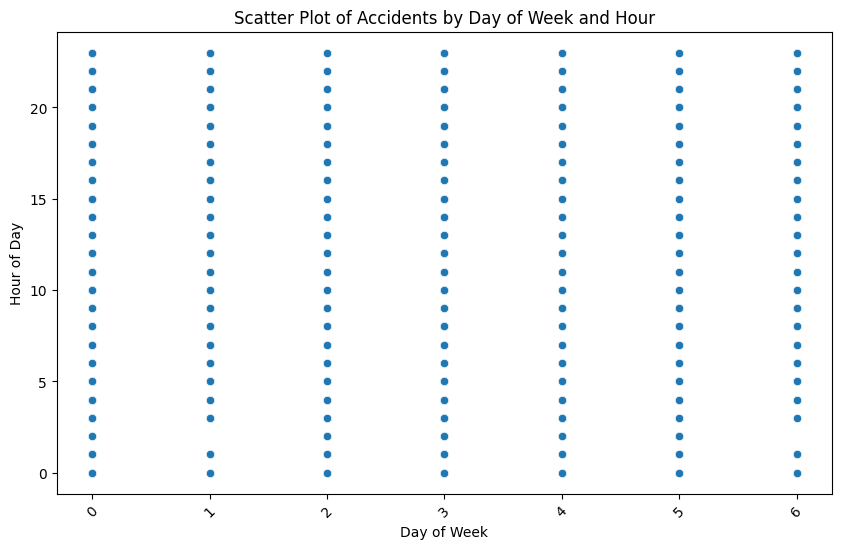

In [282]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day_of_week', y='Hour')
plt.title('Scatter Plot of Accidents by Day of Week and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Day_of_week', ylabel='Service_year_of_vehicle'>

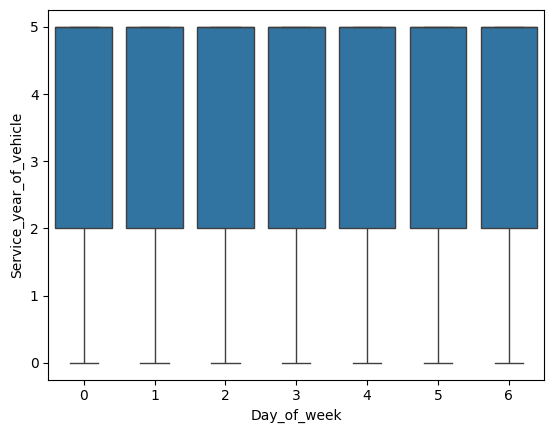

In [280]:
sns.boxplot(data=df, x='Day_of_week', y='Service_year_of_vehicle')

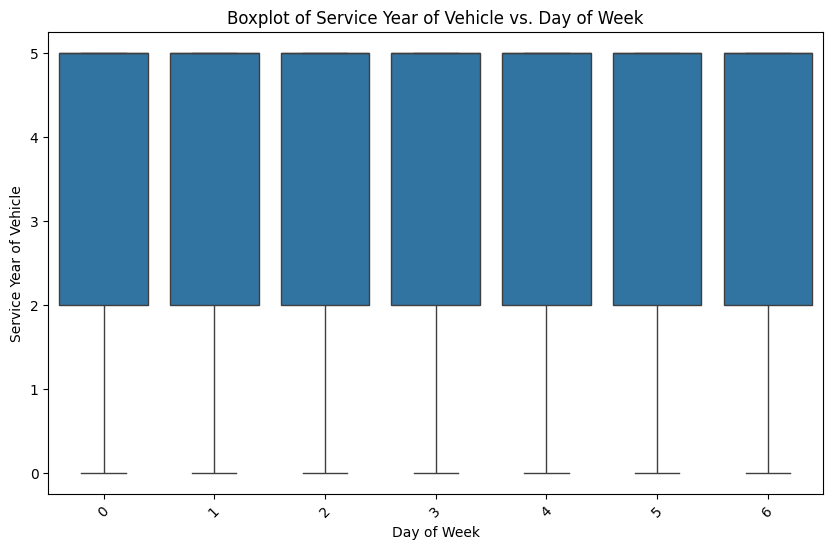

In [278]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Service_year_of_vehicle', data=df)
plt.title('Boxplot of Service Year of Vehicle vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Service Year of Vehicle')
plt.xticks(rotation=45)
plt.show()


In [228]:
def categorize_age(age_band):
    if age_band in ['18-30', '31-50']:
        return 'Young'
    elif age_band in ['51-65']:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['Driver_Age_Category'] = df['Age_band_of_driver'].apply(categorize_age)


In [230]:
df['Service_year_of_vehicle'] = pd.to_numeric(df['Service_year_of_vehicle'], errors='coerce')

current_year = 2024
df['Vehicle_Age'] = current_year - df['Service_year_of_vehicle']

In [231]:
education_order = {'Below High School': 1, 'High School': 2, 'Some College': 3, 'Bachelor': 4, 'Master': 5, 'PhD': 6}
df['Driver_Education_Level'] = df['Educational_level'].map(education_order)


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [283]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)

Training set shape (X_train): (9852, 32)
Testing set shape (X_test): (2464, 32)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [289]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df[col] = (df[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [290]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_prec = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}")
print(f"Logistic Regression - Precision: {log_reg_prec:.4f}")
print(f"Logistic Regression - Recall: {log_reg_recall:.4f}")
print(f"Logistic Regression - F1 Score: {log_reg_f1:.4f}")

Logistic Regression - Accuracy: 0.8377
Logistic Regression - Precision: 0.7017
Logistic Regression - Recall: 0.8377
Logistic Regression - F1 Score: 0.7637


#### Decision Tree Classifier

In [296]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_prec = precision_score(y_test, y_pred_tree, average='weighted')
tree_recall = recall_score(y_test, y_pred_tree, average='weighted')
tree_f1 = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_tree)
print(f"Decision Tree - Accuracy: {tree_acc:.4f}")
print(f"Decision Tree - Precision: {tree_prec:.4f}")
print(f"Decision Tree - Recall: {tree_recall:.4f}")
print(f"Decision Tree - F1 Score: {tree_f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=str(y.unique()))
plt.show()


Decision Tree - Accuracy: 0.7593
Decision Tree - Precision: 0.7660
Decision Tree - Recall: 0.7593
Decision Tree - F1 Score: 0.7626
Confusion Matrix:
[[  12    7   18]
 [   7   98  258]
 [  23  280 1761]]


InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int' or None. Got '[2 1 0]' instead.

<Figure size 2000x1000 with 0 Axes>

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: